# Visualization of results
The objective of this notebook is to display the results obtained through the inversion in a nice way, and be able to check them against the observations as a sanity check.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from itertools import chain

# Small Region

## Load results and parameters used in the images

In [2]:
'''
MINLON=-180
MAXLON=-130
MINLAT=72.5
MAXLAT=80
'''

MINLON=-179
MAXLON=179
MINLAT=60
MAXLAT=87.5

extent = [MINLON, MAXLON, MINLAT, MAXLAT]
parametrization = 1 

In [3]:
# Images
cs2_freeboard_file = np.loadtxt(f"../images/mean_cs2_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_{parametrization}.txt")
ak_freeboard_file  = np.loadtxt(f"../images/mean_ak_{MINLON}_{MAXLON}_{MINLAT}_{MAXLAT}_{parametrization}.txt")

# Observations
observations = pd.read_csv('../snow_ice_observations_complete_fixed.txt', delim_whitespace=True, skiprows=1, names=["Longitude", "Latitude", "Type", "Value", "StdDev"], header=None)

## Create Maps

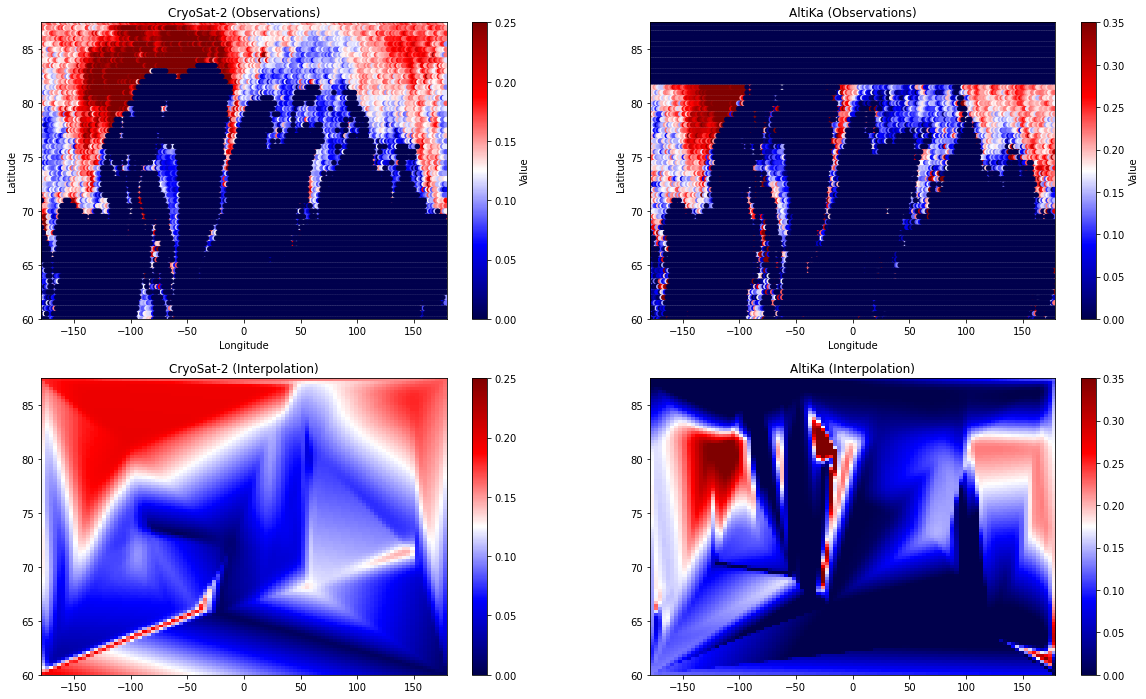

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
observations[observations['Type'] == 0.0].plot.scatter(ax= ax[0, 0], x='Longitude', y='Latitude', c='Value', 
                                                       cmap='seismic', title="CryoSat-2 (Observations)",
                                                       vmin=0, vmax=0.25)

observations[observations['Type'] == 1.0].plot.scatter(ax= ax[0, 1], x='Longitude', y='Latitude', c='Value', cmap='seismic', title="AltiKa (Observations)", vmin=0, vmax=0.35)

ax[0, 0].set_xlim(MINLON, MAXLON)
ax[0, 1].set_xlim(MINLON, MAXLON)
ax[0, 0].set_ylim(MINLAT, MAXLAT)
ax[0, 1].set_ylim(MINLAT, MAXLAT)

img = ax[1, 0].imshow(cs2_freeboard_file, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.25, origin='lower', interpolation='None')
ax[1, 0].set_title("CryoSat-2 (Interpolation)")
plt.colorbar(img, ax=ax[1, 0])

img = ax[1, 1].imshow(ak_freeboard_file, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.35, origin='lower', interpolation='None')
ax[1, 1].set_title("AltiKa (Interpolation)")
plt.colorbar(img, ax=ax[1, 1])
plt.show()


# Entire Map

## Load results and parameters used in the images

In [4]:
MINLON=-180
MAXLON=180
MINLAT=60
MAXLAT=90
extent = [MINLON, MAXLON, MINLAT, MAXLAT]

In [2]:
# Images
ak_snow_freeboard_file_voronoi = np.loadtxt(f"../images/means/201304_AKfb_1.5lon_x_0.5lat.txt_snow")
ak_ice_freeboard_file_voronoi = np.loadtxt(f"../images/means/201304_AKfb_1.5lon_x_0.5lat.txt_ice")
cs2_snow_freeboard_file_voronoi  = np.loadtxt(f"../images/means/201304_CS2fb_1.5lon_x_0.5lat.txt_snow")
cs2_ice_freeboard_file_voronoi  = np.loadtxt(f"../images/means/201304_CS2fb_1.5lon_x_0.5lat.txt_ice")

# Observations
observations = pd.read_csv('../observations.txt', delim_whitespace=True, skiprows=1, names=["Longitude", "Latitude", "Type", "Value", "StdDev"], header=None)

## Create Maps

NameError: name 'cs2_freeboard_file' is not defined

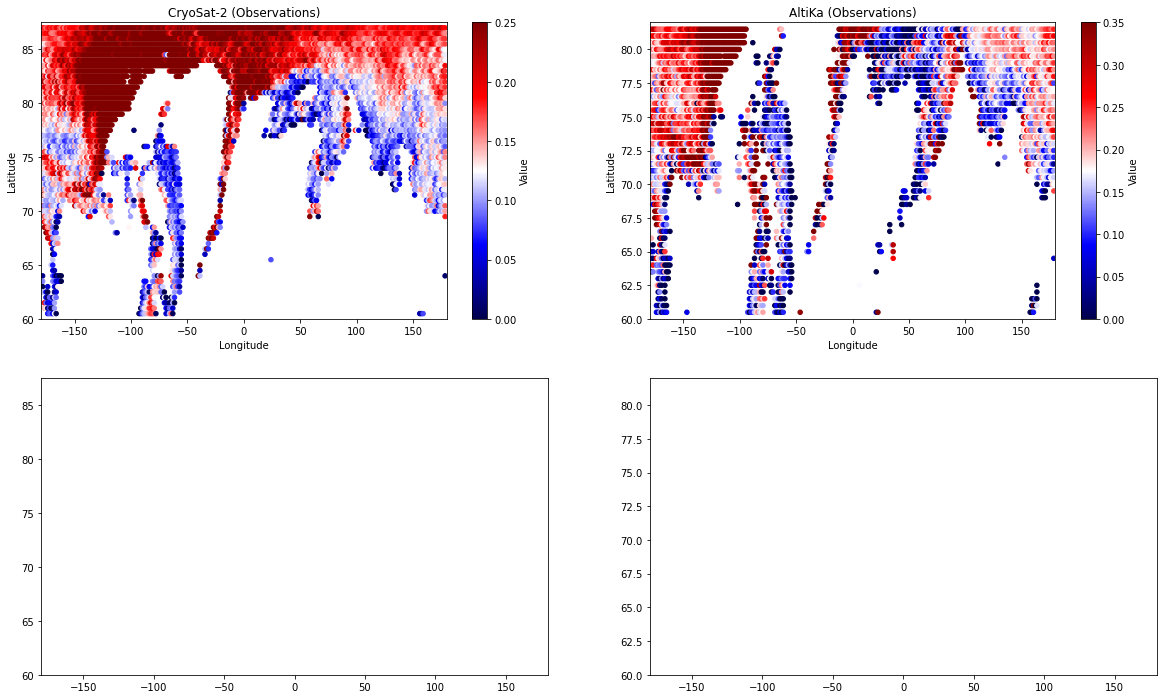

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
observations[observations['Type'] == 0.0].plot.scatter(ax= ax[0, 0], x='Longitude', y='Latitude', c='Value', 
                                                       cmap='seismic', title="CryoSat-2 (Observations)",
                                                       vmin=0, vmax=0.25)

observations[observations['Type'] == 1.0].plot.scatter(ax= ax[0, 1], x='Longitude', y='Latitude', c='Value',
                                                       cmap='seismic', title="AltiKa (Observations)",
                                                       vmin=0, vmax=0.35)

ax[0, 0].set_xlim(MINLON, MAXLON)
ax[0, 1].set_xlim(MINLON, MAXLON)
ax[0, 0].set_ylim(60, 87.5)
ax[0, 1].set_ylim(60, 82)

ax[1, 0].set_xlim(MINLON, MAXLON)
ax[1, 1].set_xlim(MINLON, MAXLON)
ax[1, 0].set_ylim(60, 87.5)
ax[1, 1].set_ylim(60, 82)



img = ax[1, 0].imshow(cs2_freeboard_file, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.25, origin='lower', interpolation='None')
ax[1, 0].set_title("CryoSat-2 (Interpolation, Voronoi tessellation)")
plt.colorbar(img, ax=ax[1, 0])

img = ax[1, 1].imshow(ak_freeboard_file, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.35, origin='lower', interpolation='None')
ax[1, 1].set_title("AltiKa (Interpolation, Voronoi tessellation)")
plt.colorbar(img, ax=ax[1, 1])
plt.show()


In [8]:
cs2_freeboard_file

array([[0.183905, 0.192892, 0.190968, ..., 0.009767, 0.007884, 0.009355],
       [0.145141, 0.154886, 0.190694, ..., 0.012193, 0.012706, 0.009871],
       [0.123479, 0.102581, 0.125892, ..., 0.016057, 0.013185, 0.011026],
       ...,
       [0.163661, 0.167294, 0.180545, ..., 0.167313, 0.164598, 0.160953],
       [0.167786, 0.179051, 0.181474, ..., 0.166328, 0.165129, 0.161908],
       [0.177583, 0.179625, 0.180939, ..., 0.162298, 0.163223, 0.162957]])

In [9]:
observations[observations['Type'] == 0.0].size

31935

In [10]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [11]:
lon = np.linspace(-180, 180, 100)
lat = np.linspace(MINLAT, MAXLAT, 100)


lon_g, lat_g = np.meshgrid(lon, lat)

lon_g = np.load("../will_lats.npy")
lat_g = np.load("../will_lons.npy")


ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 25921.

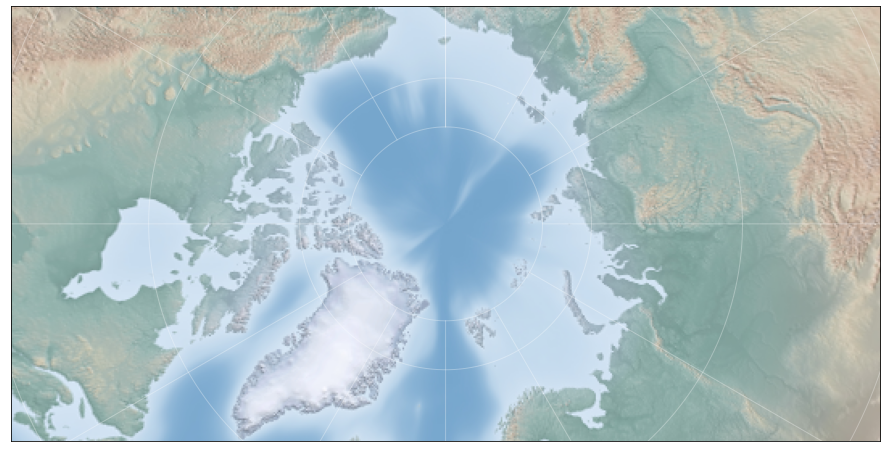

In [12]:
# 1. Draw map background:
plt.figure(figsize=(16, 8))
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=1E7, height=0.5E7)
draw_map(m)

# 2. Scatter observation data
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs2_freeboard_file, cmap="seismic")
plt.colorbar(label=r'Freeboard thickness (m)')

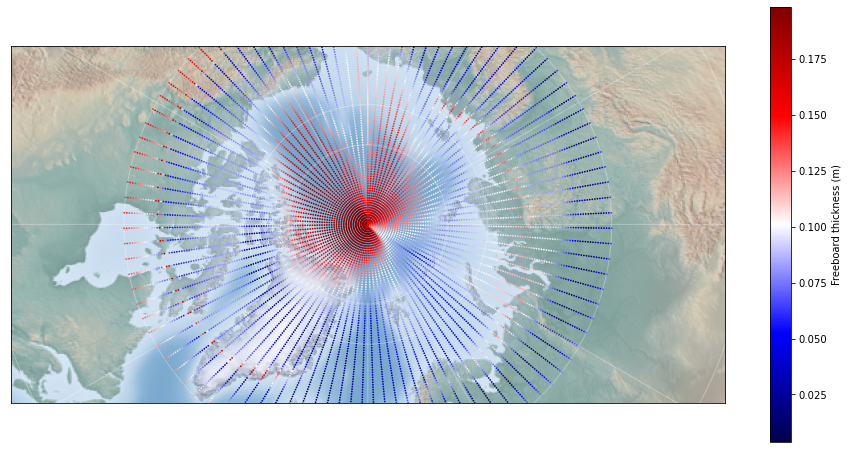

In [ ]:
# 1. Draw map background:
plt.figure(figsize=(16, 8))
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=1E7, height=0.5E7)
draw_map(m)

# 2. Scatter observation data
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs2_freeboard_file, cmap="seismic")
plt.colorbar(label=r'Freeboard thickness (m)')

## Comparing Voronoi Tessellation and Delaunay 

In [ ]:
cs2_freeboard_file_delaunay = np.loadtxt(f"../images/mean_cs2_-180.0_178.5_60.0_88.0_1.txt")
cs2_freeboard_file_voronoi = np.loadtxt(f"../images/mean_cs2_-180_180_60_90_complete_0.txt")

In [ ]:
MINLON=-179
MAXLON=179
MINLAT=60
MAXLAT=87.5

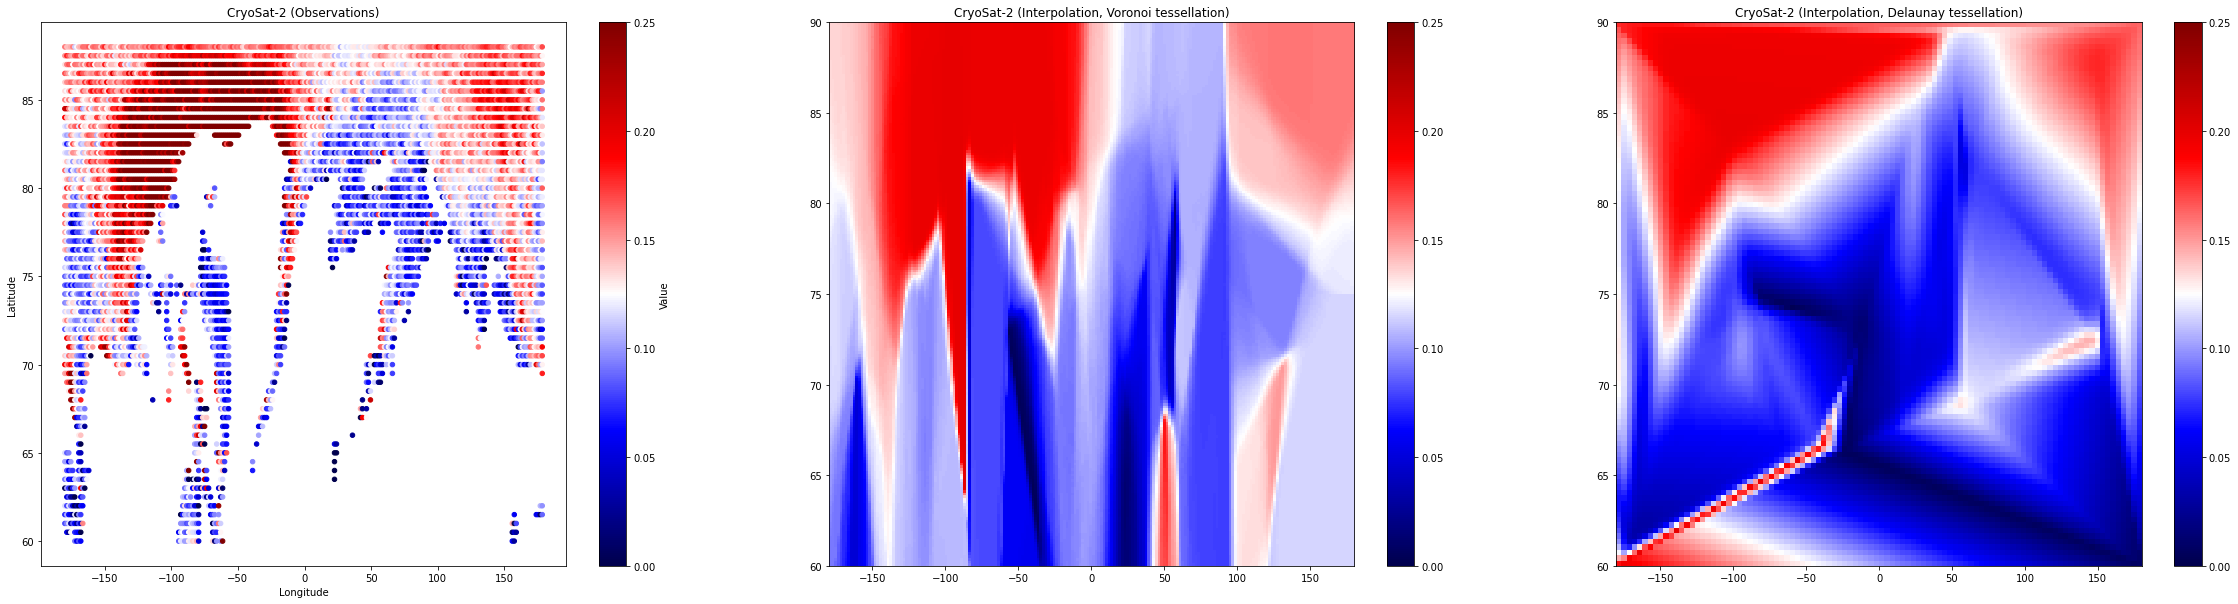

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(40, 10))
observations[observations['Type'] == 0.0].plot.scatter(ax= ax[0], x='Longitude', y='Latitude', c='Value', 
                                                       cmap='seismic', title="CryoSat-2 (Observations)",
                                                       vmin=0, vmax=0.25)


'''
ax[0].set_xlim(MINLON, MAXLON)
ax[0].set_ylim(MINLAT, MAXLAT)

ax[1].set_xlim(MINLON, MAXLON)
ax[1].set_ylim(MINLAT, MAXLAT)

ax[2].set_xlim(MINLON, MAXLON)
ax[2].set_ylim(MINLAT, MAXLAT)
'''





img = ax[1].imshow(cs2_freeboard_file_voronoi, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.25, origin='lower', interpolation='None')
ax[1].set_title("CryoSat-2 (Interpolation, Voronoi tessellation)")
plt.colorbar(img, ax=ax[1])

img = ax[2].imshow(cs2_freeboard_file, cmap = 'seismic', aspect='auto', extent=extent, vmin=0, vmax=0.25, origin='lower', interpolation='None')
ax[2].set_title("CryoSat-2 (Interpolation, Delaunay tessellation)")
plt.colorbar(img, ax=ax[2])

plt.show()




# Will's Lats Lons


In [13]:
lats = np.load("../will_lats.npy")
lons = np.load("../will_lons.npy")

In [15]:
lats

array([[48.49285803, 48.77012045, 49.04579976, ..., 42.268986  ,
        41.96948672, 41.66949099],
       [48.77012045, 49.04994686, 49.32820695, ..., 42.49587828,
        42.19425448, 41.89215454],
       [49.04579976, 49.32820695, 49.60906554, ..., 42.72101292,
        42.41726329, 42.11305827],
       ...,
       [42.268986  , 42.49587828, 42.72101292, ..., 37.06523615,
        36.81001408, 36.55396962],
       [41.96948672, 42.19425448, 42.41726329, ..., 36.81001408,
        36.55676582, 36.30268474],
       [41.66949099, 41.89215454, 42.11305827, ..., 36.55396962,
        36.30268474, 36.05055701]])